In [3]:
#  Loading the Data
import pandas as pd
# Load the CSV file
data = pd.read_csv("../data/sales_data.csv")
print("Data Loaded:\n", data.head())

Data Loaded:
    OrderID   Product  Quantity  Price        Date  
0        1  Widget A       4.0   20.0  2023-01-01  
1        2  Widget B       2.0   15.0  2023-01-01  
2        3  Widget A       1.0   20.0  2023-01-02  
3        4  Widget C       5.0   30.0  2023-01-03  
4        5  Widget B       NaN   15.0  2023-01-04  


In [ ]:
# Cleaning the Data
# 1. Handling Missing Values:
print("Missing Values:\n", data.isnull().sum())


Missing Values:
 OrderID     0
Product     0
Quantity    0
Price       0
Date        0
dtype: int64


In [6]:
# Fill missing Quantity with 0 and drop rows with missing Product
data['Quantity'].fillna(0, inplace=True)
data.dropna(subset=['Product'], inplace=True)
print("Data after Handling Missing Values:\n", data)

Data after Handling Missing Values:
    OrderID   Product  Quantity  Price        Date  
0        1  Widget A       4.0   20.0  2023-01-01  
1        2  Widget B       2.0   15.0  2023-01-01  
2        3  Widget A       1.0   20.0  2023-01-02  
3        4  Widget C       5.0   30.0  2023-01-03  
4        5  Widget B       0.0   15.0  2023-01-04  
5        6  Widget A       3.0   20.0  2023-01-05  
7        8  Widget C       2.0   30.0  2023-01-07  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14900\652899096.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Quantity'].fillna(0, inplace=True)


In [10]:
print(data.columns)


Index(['OrderID', 'Product', 'Quantity', 'Price', 'Date  '], dtype='object')


In [11]:
data.columns = data.columns.str.strip()  # Removes leading/trailing spaces from column names


In [12]:
data['Date'] = pd.to_datetime(data['Date'])


In [13]:
print(data.head())


   OrderID   Product  Quantity  Price       Date
0        1  Widget A       4.0   20.0 2023-01-01
1        2  Widget B       2.0   15.0 2023-01-01
2        3  Widget A       1.0   20.0 2023-01-02
3        4  Widget C       5.0   30.0 2023-01-03
4        5  Widget B       0.0   15.0 2023-01-04


In [14]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')


In [15]:
import pandas as pd

# Assuming you have already loaded your data into the 'data' DataFrame
# If you haven't loaded the data yet, use the following code to load the CSV file:
# data = pd.read_csv('sales_data.csv')

# Step 1: Check column names for any leading or trailing spaces
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces from column names

# Step 2: Verify the columns in your dataframe
print("Columns in Dataframe:\n", data.columns)

# Step 3: Check for the presence of the 'Date' column
if 'Date' in data.columns:
    # Step 4: Convert 'Date' to datetime format, handle errors by coercing invalid values to NaT
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    # Step 5: Check the data types after conversion
    print("Data Types After Conversion:\n", data.dtypes)

    # Step 6: Check for any missing or invalid dates (NaT)
    print("\nMissing or Invalid Dates:\n", data[data['Date'].isnull()])
else:
    print("The 'Date' column is missing from the dataset.")


Columns in Dataframe:
 Index(['OrderID', 'Product', 'Quantity', 'Price', 'Date'], dtype='object')
Data Types After Conversion:
 OrderID              int64
Product             object
Quantity           float64
Price              float64
Date        datetime64[ns]
dtype: object

Missing or Invalid Dates:
 Empty DataFrame
Columns: [OrderID, Product, Quantity, Price, Date]
Index: []


In [16]:
# Remove duplicates
data.drop_duplicates(inplace=True)
print("Data after Removing Duplicates:\n", data)

Data after Removing Duplicates:
    OrderID   Product  Quantity  Price       Date
0        1  Widget A       4.0   20.0 2023-01-01
1        2  Widget B       2.0   15.0 2023-01-01
2        3  Widget A       1.0   20.0 2023-01-02
3        4  Widget C       5.0   30.0 2023-01-03
4        5  Widget B       0.0   15.0 2023-01-04
5        6  Widget A       3.0   20.0 2023-01-05
7        8  Widget C       2.0   30.0 2023-01-07


In [17]:
# Calculate total sales
data['TotalSales'] = data['Quantity'] * data['Price']
print("Data with Total Sales:\n", data)

Data with Total Sales:
    OrderID   Product  Quantity  Price       Date  TotalSales
0        1  Widget A       4.0   20.0 2023-01-01        80.0
1        2  Widget B       2.0   15.0 2023-01-01        30.0
2        3  Widget A       1.0   20.0 2023-01-02        20.0
3        4  Widget C       5.0   30.0 2023-01-03       150.0
4        5  Widget B       0.0   15.0 2023-01-04         0.0
5        6  Widget A       3.0   20.0 2023-01-05        60.0
7        8  Widget C       2.0   30.0 2023-01-07        60.0


In [18]:
# Filter sales for Widget A
widget_a_sales = data[data['Product'] == 'Widget A']
print("Sales for Widget A:\n", widget_a_sales)

Sales for Widget A:
    OrderID   Product  Quantity  Price       Date  TotalSales
0        1  Widget A       4.0   20.0 2023-01-01        80.0
2        3  Widget A       1.0   20.0 2023-01-02        20.0
5        6  Widget A       3.0   20.0 2023-01-05        60.0


In [20]:
# Group by Product and sum TotalSales
summary = data.groupby('Product')['TotalSales'].sum().reset_index()
print("Sales Summary by Product:\n", summary)

Sales Summary by Product:
     Product  TotalSales
0  Widget A       160.0
1  Widget B        30.0
2  Widget C       210.0


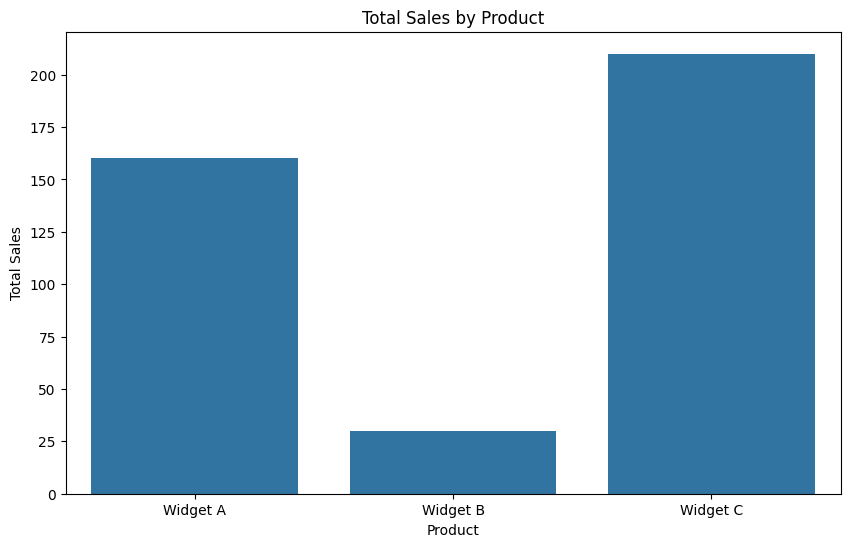

In [21]:
# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
# Bar plot for total sales by product
plt.figure(figsize=(10, 6))
sns.barplot(data=summary, x='Product', y='TotalSales')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.show()